In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR="."
CHAPTER_ID="svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
import pandas as pd

file_path="D:/study/ml/数据/ae信号/dfnc.xlsx"
df=pd.read_excel(file_path)

In [3]:

y=df["BQ"]



In [4]:
df2=df.drop(['BQ'], axis=1)


In [5]:
df2=np.array(df2)


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X=df2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_clf=SVC(kernel="linear")
svm_clf_fit=svm_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_pred=svm_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

Train=np.insert(X_train,0,values=y_train,axis=1)
Train=pd.DataFrame(Train)
Train.columns = ['BQ','X_train','y_train']
Train.to_excel('HZ_train.xlsx',index = False)
Test=np.insert(X_test,0,values=y_test,axis=1)
Test=pd.DataFrame(Test)
Test.columns=['BQ','X_test','y_test']
Test.to_excel('HZ_test.xlsx',index=False)

1.0


In [7]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 1568)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    print((-w[0]/w[1]),(- b/w[1]))
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=4, facecolors='#FFAAAA')#这个画粉色点，s改变大小
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
#     plt.plot(x0, gutter_up, "k--", linewidth=2)
#     plt.plot(x0, gutter_down, "k--", linewidth=2)#这两个是画斜线

-348.74103982037565 1066.9781157364964
Saving figure svm汇总


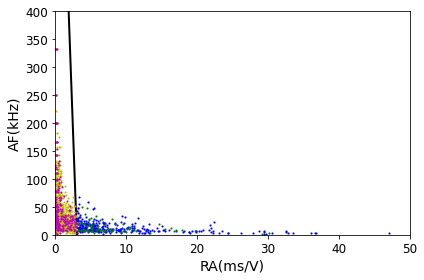

In [9]:
plot_svc_decision_boundary(svm_clf, 0, 50)
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs",markersize=1)
plt.plot(X_test[:, 0][y_test==1], X_test[:, 1][y_test==1], "gs",markersize=1)
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "yo",markersize=1)
plt.plot(X_test[:, 0][y_test==0], X_test[:, 1][y_test==0], "mo",markersize=1)
plt.xlabel("RA(ms/V)", fontsize=14)
plt.ylabel("AF(kHz)", fontsize=14)
plt.axis([0, 50, 0, 400])

save_fig("svm汇总")
plt.show()